<a href="https://colab.research.google.com/github/AkhmadRamadani/PCVK-2025-PUBLIC/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: **Akhmad Ramadani**


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

## Fungsi Konvolusi
Fungsi convolution2d ini memiliki 4 parameter yaitu image, kernel, stride, dan padding.

1. image : matriks gambar 2 dimensi yang akan diolah oleh kernel dengan operasi konvolusi
2. kernel : matriks filter 2 dimensi yang digunakan untuk memproses gambar input, dimana ukuran kernel biasanya lebih kecil daripada gambar input
3. stride : bilangan bulat yang menunjukkan jumlah piksel yang diabaikan antara filter saat bergerak di sepanjang gambar input
4. padding : bilangan bulat yang menunjukkan jumlah piksel yang ditambahkan ke tepi gambar input sebelum melakukan operasi konvolusi dengan filter

In [3]:
def convolution2d(image, kernel, stride = 1, padding = 0):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  image_result = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      image_result[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return image_result

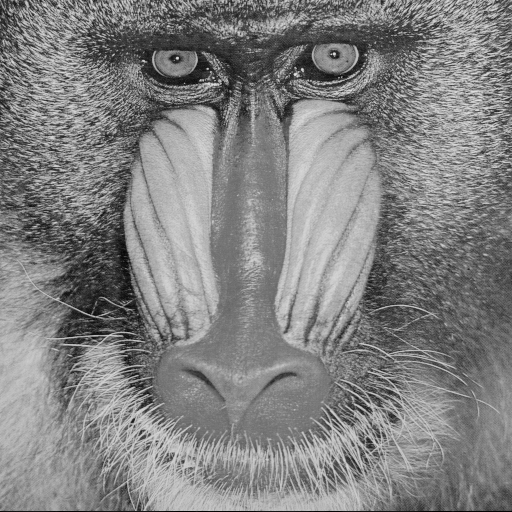

In [4]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/Week6/mandrill.tiff')
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv2_imshow(img1_gray)

### Sharpen
Di bawah ini adalah teknik untuk menajamkan citra menggunakan kernel


```
sharpener_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0],
    ]
)
```



In [5]:
sharpener_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0],
    ]
)

In [6]:
sharpened_image = convolution2d(img1_gray, sharpener_kernel, padding=1)

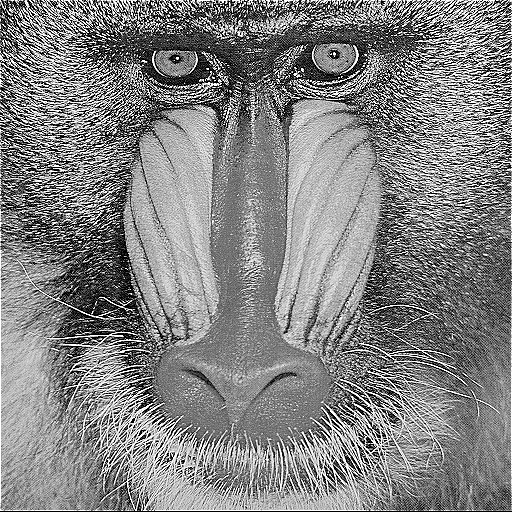

In [7]:
cv2_imshow(sharpened_image)

### Emboss
Di bawah ini adalah teknik untuk menghasilkan efek timbul pada citra menggunakan kernel


```
embosser_kernel = np.array(
    [
        [-2,-1, 0],
        [-1, 1, 1],
        [ 0, 1, 2]
    ]
)
```



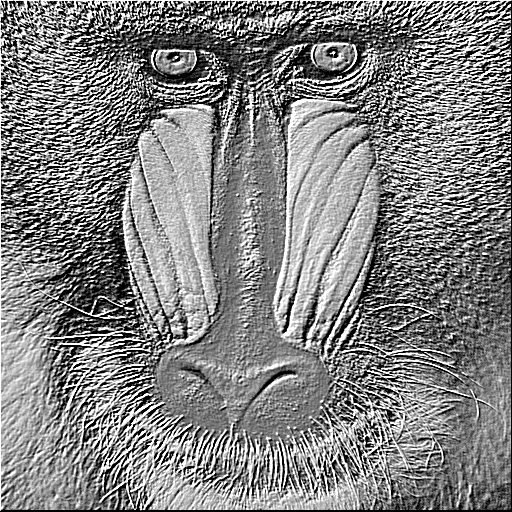

In [8]:
embosser_kernel = np.array(
    [
        [-2,-1, 0],
        [-1, 1, 1],
        [ 0, 1, 2]
    ]
)
embossed_image = convolution2d(img1_gray, embosser_kernel, padding=1)
cv2_imshow(embossed_image)

### Edge Detection
Edge detection digunakan untuk mengetahui garis-garis yang membentuk objek. Pada kali ini terdapat 3 kernel untuk membuat edge detection, yaitu:


#### Left Sobel Edge Detection


```
left_sobel_edge_detector_kernel = np.array(
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
  )
```



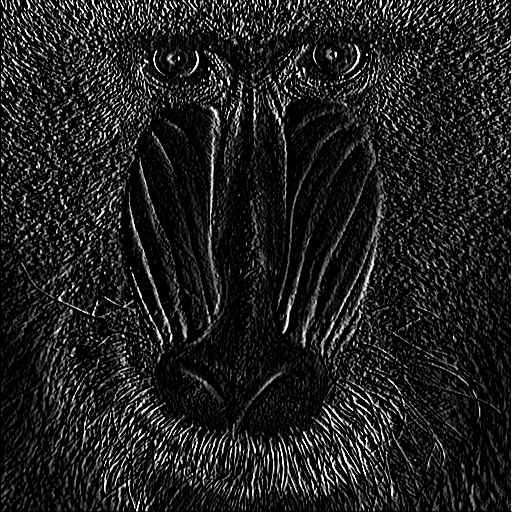

In [9]:
left_sobel_edge_detector_kernel = np.array(
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
  )

edge_detection_img = convolution2d(img1_gray, left_sobel_edge_detector_kernel, padding=1)
cv2_imshow(edge_detection_img)

#### Canny Edge Detection


```
canny_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [-1, 8,-1],
        [-1,-1,-1]
    ]
)

```



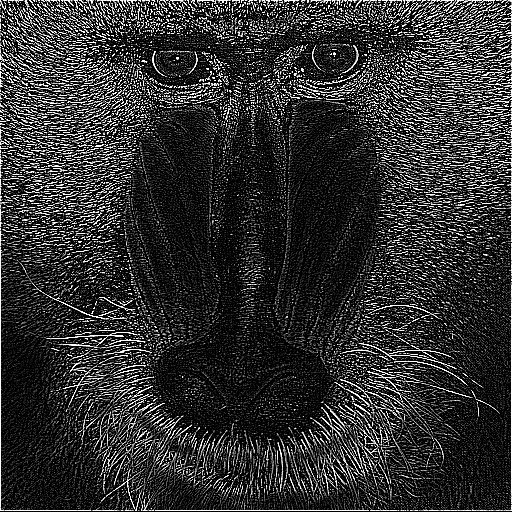

In [10]:
canny_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [-1, 8,-1],
        [-1,-1,-1]
    ]
)

canny_edge_detection_img = convolution2d(img1_gray, canny_edge_detector_kernel, padding=1)
cv2_imshow(canny_edge_detection_img)

#### Prewit Edge Detection


```
prewit_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [ 0, 0, 0],
        [ 1, 1, 1]
    ]
)
```



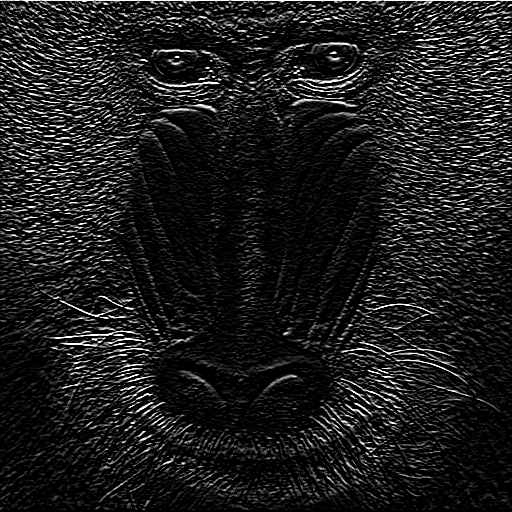

In [11]:
prewit_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [ 0, 0, 0],
        [ 1, 1, 1]
    ]
)

prewit_edge_detection_img = convolution2d(img1_gray, prewit_edge_detector_kernel, padding=1)
cv2_imshow(prewit_edge_detection_img)

### Gaussian Blur
Digunakan untuk mengurangi noise atau gangguan pada gambar dan juga untuk membuat gambar menjadi lebih halus atau terlihat lebih smooth.

Pada kali ini menggunakan 2 kernel gaussian blur yaitu:

#### Gaussian Blur 5x5


```
gaussian_blur_5 = np.array(
    [
        [1/256, 4/256, 6/256, 4/256, 1/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [6/256, 24/256, 36/256, 24/256, 6/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [1/256, 4/256, 6/256, 4/256, 1/256]
    ]
)
```



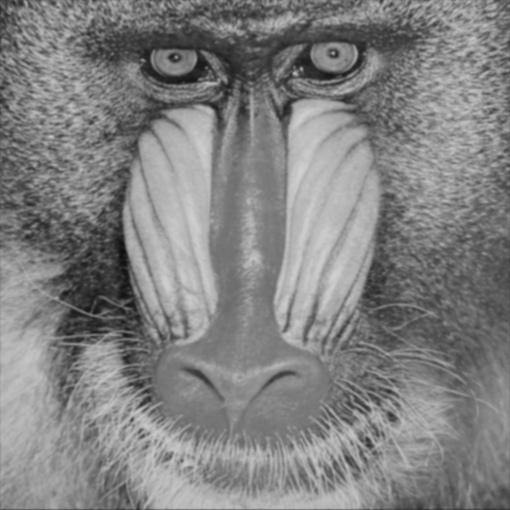

In [12]:
gaussian_blur_5 = np.array(
    [
        [1/256, 4/256, 6/256, 4/256, 1/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [6/256, 24/256, 36/256, 24/256, 6/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [1/256, 4/256, 6/256, 4/256, 1/256]
    ]
)

gaussian_blur_img = convolution2d(img1_gray, gaussian_blur_5, padding=1)
cv2_imshow(gaussian_blur_img)

#### Gaussian Blur 21*21
Pada gaussian blur 21*21 ini kita menggenerate kernel menggunakan kode di bawah ini

```
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gaussian = gaussian_kernel @ gaussian_kernel.transpose()
```


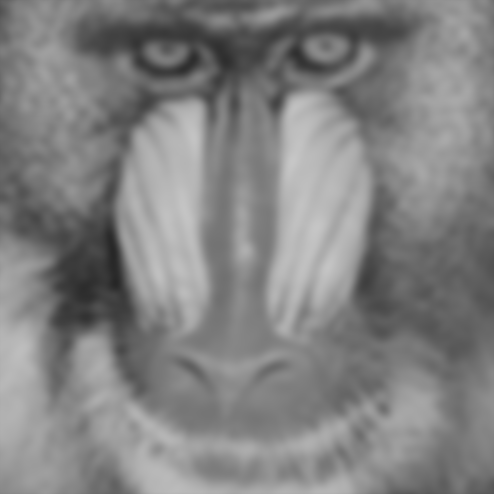

In [13]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gaussian = gaussian_kernel @ gaussian_kernel.transpose()


gaussian_blur_21_img = convolution2d(img1_gray, kernel_gaussian, padding=1)
cv2_imshow(gaussian_blur_21_img)

# FILTER LIBRARY DAN FILTER MODERN

## Percobaan 1

Pada percobaan 1 ini, kita akan membuat Filter Gaussian, Sharpen, dan Canny menggunakan library filter2d dari OpenCV. Filter ini akan kita terapkan pada Image RGB. Pada bagian awal kode terdapat fungsi show_side_by_side yang digunakan untuk menampilkan gambar secara berdampingan.

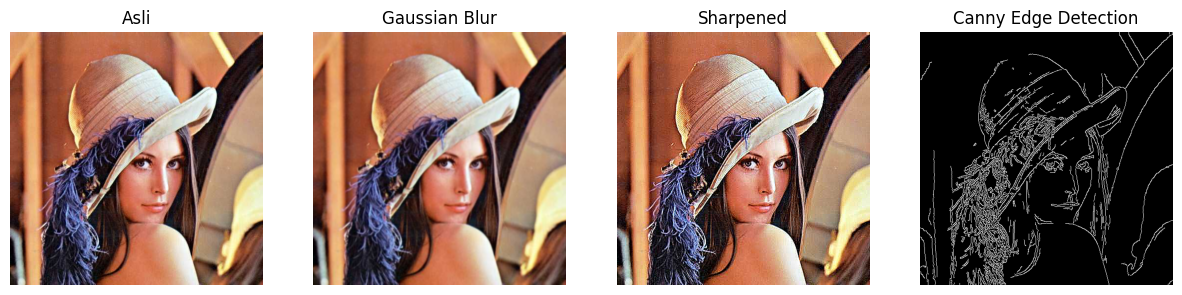

In [14]:
def show_side_by_side(images, titles, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # grayscale
            plt.subplot(1, len(images), i + 1)
            plt.imshow(img, cmap="gray")
        else:  # color
            plt.subplot(1, len(images), i + 1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()


img_lena = cv.imread("/content/drive/MyDrive/PCVK/Week5/lena.jpg")
img_lena_gray = cv.cvtColor(img_lena, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img_lena, (7, 7), 1)
edges = cv.Canny(cv.cvtColor(img_lena, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened = cv.filter2D(img_lena, -1, sharpen_kernel)

show_side_by_side([img_lena, blur, sharpened, edges],
                  ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])


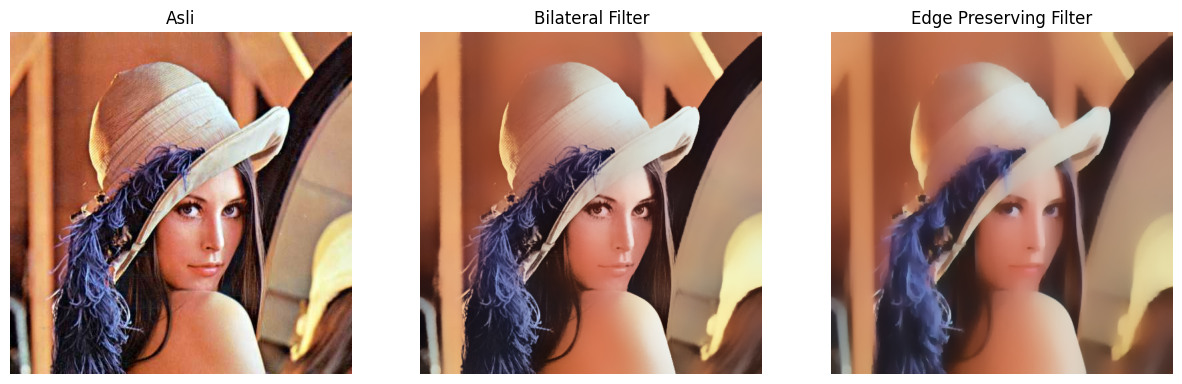

In [15]:
bilateral = cv.bilateralFilter(img_lena, 50, 100, 100)

edge_preserve = cv.edgePreservingFilter(img_lena, flags=1, sigma_s=100, sigma_r=0.9)
show_side_by_side([img_lena, bilateral, edge_preserve],
["Asli", "Bilateral Filter", "Edge Preserving Filter"])

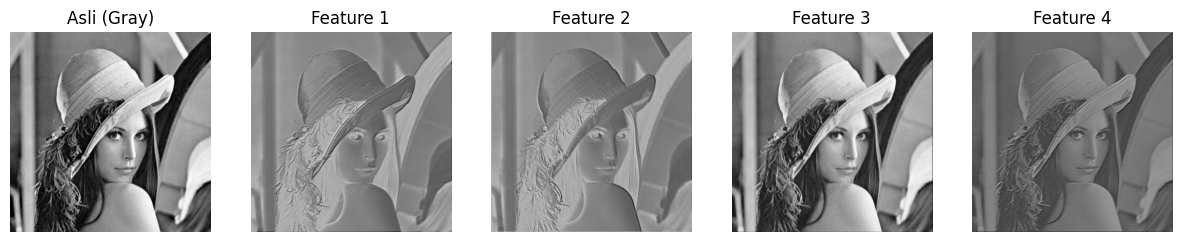

In [16]:
# Filter Feature Map yang digunakan pada CNN
# Lakukan running code bagian ini beberapa kali dan perhatikan hasilnya
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)


model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_lena_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0, i].numpy() for i in range(features.shape[1])]
show_side_by_side(
    [img_lena_gray] + feature_maps,
    ["Asli (Gray)"] + [f"Feature {i + 1}" for i in range(len(feature_maps))]
)

In [32]:
smooth = cv.bilateralFilter(img_lena, d=15, sigmaColor=75, sigmaSpace=75)

gaussian = cv.GaussianBlur(smooth, (0, 0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

alpha = 1.2  # contrast
beta = 15    # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

sepia_kernel = np.array([
    [0.272, 0.534, 0.131],
    [0.349, 0.686, 0.168],
    [0.393, 0.769, 0.189]
])
sepia = cv.transform(img_lena, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

rows, cols = img_lena.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols * 0.6)
kernel_y = cv.getGaussianKernel(rows, rows * 0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()

vignette = np.copy(sepia)
for i in range(3):
    vignette[:, :, i] = vignette[:, :, i] * mask

noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img_lena = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)


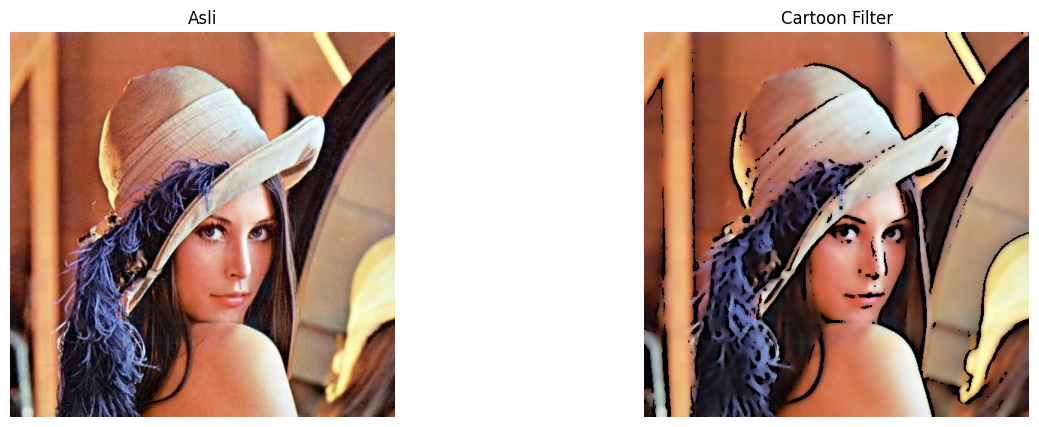

In [18]:
#Filter Anime / Cartoon

gray = cv. cvtColor(img_lena, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur (gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9, 9)

color = cv.bilateralFilter(img_lena, d=9, sigmaColor=200, sigmaSpace=200)

cartoon = cv.bitwise_and(color, color, mask=edges)

show_side_by_side([img_lena, cartoon], ["Asli", "Cartoon Filter"])

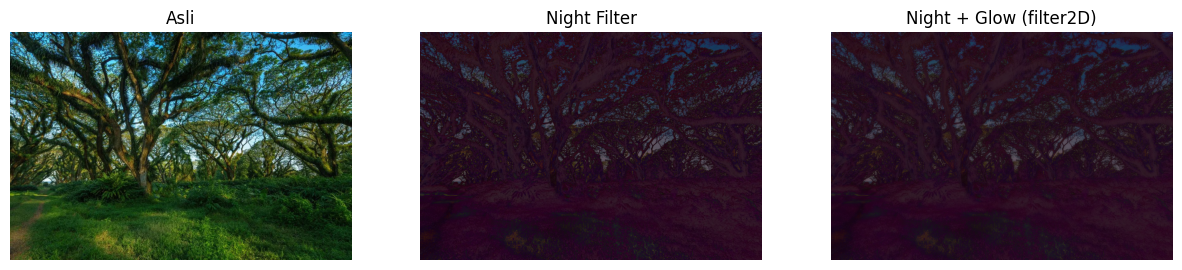

In [19]:
#Night Filter
img_djawatan = cv.imread("/content/drive/MyDrive/PCVK/Week5/djawatan.jpg")
img_djawatan_gray = cv.cvtColor(img_djawatan, cv.COLOR_BGR2GRAY)

night = cv.convertScaleAbs(img_djawatan, alpha=0.6, beta=-40)

blue_tint = np.full_like(night, (50, 0, 100)) # BGR
night = cv.addWeighted (night, 0.8, blue_tint, 0.2, 0)

kernel = np.ones ( (15,15), np.float32) / 225
glow = cv. filter2D(night, -1, kernel)

night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)
show_side_by_side([img_djawatan, night, night_glow],
["Asli", "Night Filter", "Night + Glow (filter2D)"])

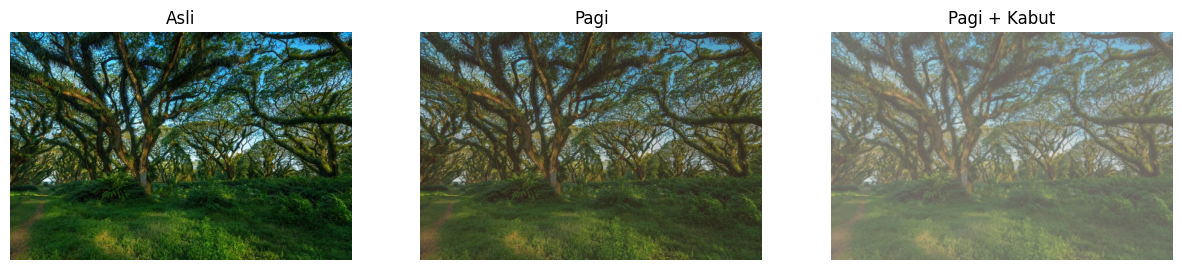

In [20]:
#Filter Suasana pagi dan Kabut

alpha = 0.9 # contrast
beta = 20
# brightness
soft = cv.convertScaleAbs(img_djawatan, alpha=alpha, beta=beta)

warm_tint = np.full_like(soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# Kernel blur Gaussian-Like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# tambah layer putih untuk kabut
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)
show_side_by_side([img_djawatan, pagi, kabut],
["Asli", "Pagi", "Pagi + Kabut"])

# Soal


**Analisis Kernel Blurring dan Sharpening**

1. **Risiko kehilangan informasi:**
   Saat citra diberi *Gaussian blur*, noise berkurang, tetapi detail halus seperti tepi jaringan, pembuluh kecil, atau tekstur penting bisa ikut hilang. Akibatnya, batas antar organ menjadi kurang tajam dan beberapa ciri diagnostik mungkin tidak terlihat.

2. **Trade-off antara reduksi noise dan pelestarian detail:**
   Semakin kuat efek blur, semakin halus citra dan semakin sedikit noise, tetapi detail medis penting ikut melemah. Sebaliknya, *sharpening* bisa mengembalikan ketajaman tepi, namun jika berlebihan bisa menimbulkan artefak atau memperkuat noise yang tersisa.
   Karena itu, diperlukan keseimbangan: cukup mengurangi noise tanpa mengorbankan tepi dan struktur penting pada citra medis.
  

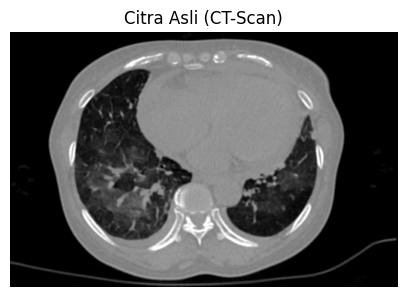

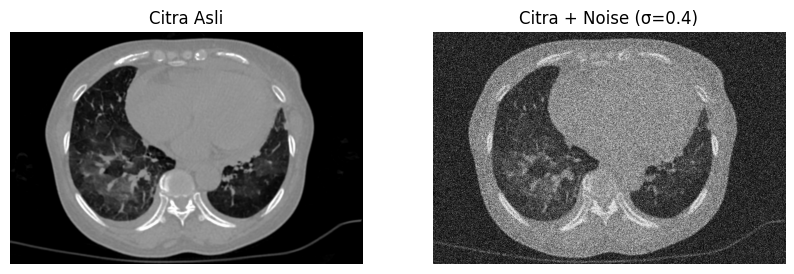

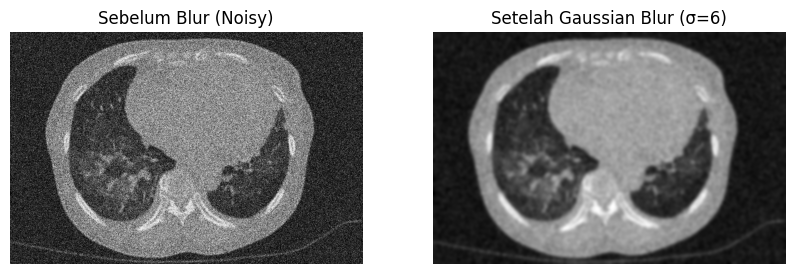

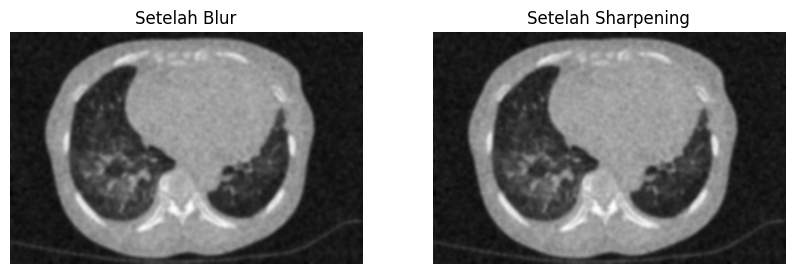

In [43]:
ct_scan_filename = '/content/drive/MyDrive/PCVK/Week6/ct_scan_covid.jpg'
img_orig = cv.imread(ct_scan_filename, cv.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

plt.figure(figsize=(5,5))
plt.imshow(img_orig, cmap='gray')
plt.title("Citra Asli (CT-Scan)")
plt.axis('off')
plt.show()

noise_sigma = 0.4  # standar deviasi noise (cukup tinggi untuk simulasi)
noise = np.random.normal(0, noise_sigma, img_orig.shape)
img_noisy = np.clip(img_orig + noise, 0, 1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_orig, cmap='gray')
plt.title("Citra Asli")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_noisy, cmap='gray')
plt.title(f"Citra + Noise (σ={noise_sigma})")
plt.axis('off')
plt.show()

sigma_blur = 6  # nilai sigma untuk Gaussian (cukup kuat untuk noise tinggi)
k = int(2 * round(3 * sigma_blur) + 1) # Menghitung ukuran kernel
if k % 2 == 0: k += 1 # Harus ganjil

img_blur = cv.GaussianBlur(img_noisy, (k, k), sigmaX=sigma_blur, sigmaY=sigma_blur)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_noisy, cmap='gray')
plt.title("Sebelum Blur (Noisy)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_blur, cmap='gray')
plt.title(f"Setelah Gaussian Blur (σ={sigma_blur})")
plt.axis('off')
plt.show()

# Kernel sharpening (Unsharp Masking sederhana)
kernel_sharpening = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

img_sharp = cv.filter2D(img_blur, -1, kernel_sharpening)
img_sharp = np.clip(img_sharp, 0, 1) # clip nilai agar tetap di batas [0, 1]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_blur, cmap='gray')
plt.title("Setelah Blur")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_sharp, cmap='gray')
plt.title("Setelah Sharpening")
plt.axis('off')
plt.show()


**Analisis Roberts Operator pada Citra High-Res dan Low-Res**

1. **Kelebihan:**

   * Roberts cepat dan sederhana karena memakai kernel kecil (2x2).
   * Dapat mendeteksi tepi dengan sangat tajam pada citra beresolusi tinggi dan noise rendah.

2. **Kelemahan:**

   * Sangat sensitif terhadap noise, sehingga banyak tepi palsu muncul.
   * Pada citra low-res, hasilnya kasar dan tepi terlihat tidak jelas karena tiap piksel mewakili area yang luas.

3. **Perbandingan dengan Sobel dan Prewitt:**

   * Sobel dan Prewitt lebih tahan terhadap noise karena memakai kernel 3x3 yang melakukan perataan lokal.
   * Hasilnya lebih halus dan stabil dibanding Roberts.
   * Namun, Roberts bisa lebih presisi dalam menentukan posisi tepi jika citra bersih dan tajam.

**Kesimpulan:**
Roberts cocok untuk citra resolusi tinggi dan minim noise, sedangkan Sobel dan Prewitt lebih baik untuk citra low-res atau yang mengandung banyak noise karena hasilnya lebih stabil dan halus.


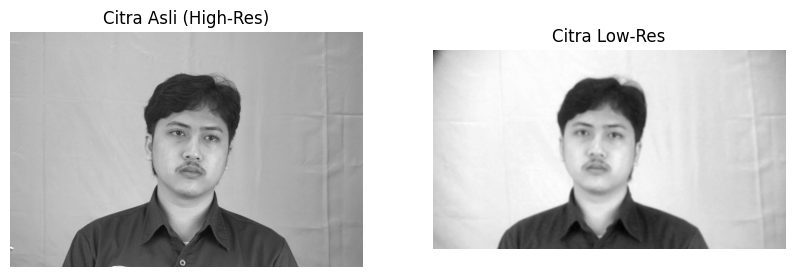

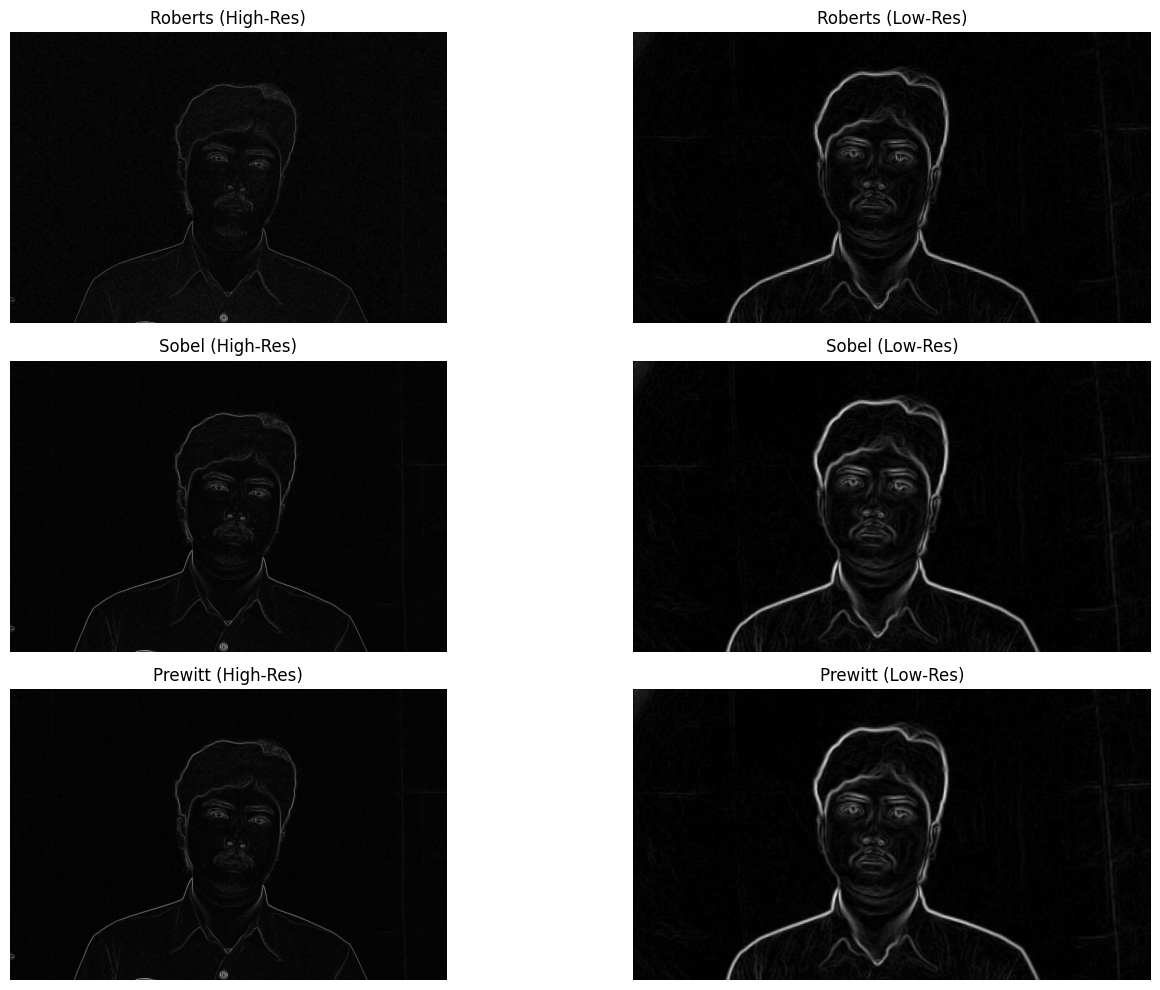

In [42]:
filename_high_res = '/content/drive/MyDrive/PCVK/Kuis/Image/A.jpg'
filename_low_res = '/content/drive/MyDrive/PCVK/Kuis/Image/B.png'

img_hr = cv.imread(filename_high_res, cv.IMREAD_GRAYSCALE).astype(np.float32)
img_lr = cv.imread(filename_low_res, cv.IMREAD_GRAYSCALE).astype(np.float32)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_hr, cmap='gray')
plt.title("Citra Asli (High-Res)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_lr, cmap='gray')
plt.title("Citra Low-Res")
plt.axis('off')
plt.show()

# Definisikan Kernel
# Roberts
kernelx_roberts = np.array([[1, 0],
                            [0, -1]], dtype=int)
kernely_roberts = np.array([[0, 1],
                            [-1, 0]], dtype=int)

# Prewitt
kernelx_prewitt = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]], dtype=int)
kernely_prewitt = np.array([[1, 1, 1],
                            [0, 0, 0],
                            [-1, -1, -1]], dtype=int)

# Menghitung Magnitude
def gradient_magnitude(img, kx, ky):
    gx = cv.filter2D(img, -1, kx)
    gy = cv.filter2D(img, -1, ky)
    return np.sqrt(gx**2 + gy**2)

# --- Roberts ---
roberts_hr = gradient_magnitude(img_hr, kernelx_roberts, kernely_roberts)
roberts_lr = gradient_magnitude(img_lr, kernelx_roberts, kernely_roberts)

# --- Sobel ---
sobel_x_hr = cv.Sobel(img_hr, cv.CV_64F, 1, 0, ksize=3)
sobel_y_hr = cv.Sobel(img_hr, cv.CV_64F, 0, 1, ksize=3)
sobel_hr = np.sqrt(sobel_x_hr**2 + sobel_y_hr**2)

sobel_x_lr = cv.Sobel(img_lr, cv.CV_64F, 1, 0, ksize=3)
sobel_y_lr = cv.Sobel(img_lr, cv.CV_64F, 0, 1, ksize=3)
sobel_lr = np.sqrt(sobel_x_lr**2 + sobel_y_lr**2)

# --- Prewitt ---
prewitt_hr = gradient_magnitude(img_hr, kernelx_prewitt, kernely_prewitt)
prewitt_lr = gradient_magnitude(img_lr, kernelx_prewitt, kernely_prewitt)

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.imshow(roberts_hr, cmap='gray')
plt.title("Roberts (High-Res)")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(roberts_lr, cmap='gray')
plt.title("Roberts (Low-Res)")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(sobel_hr, cmap='gray')
plt.title("Sobel (High-Res)")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(sobel_lr, cmap='gray')
plt.title("Sobel (Low-Res)")
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(prewitt_hr, cmap='gray')
plt.title("Prewitt (High-Res)")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(prewitt_lr, cmap='gray')
plt.title("Prewitt (Low-Res)")
plt.axis('off')

plt.tight_layout()
plt.show()


**Konvolusi dan Efek pada Piksel Pinggir**

1. **Padding Nol (BORDER_CONSTANT)**

   * Area tepi diisi dengan nilai nol (hitam).
   * Hasilnya: tepi citra tampak lebih gelap dan tepi objek terlihat lebih kuat, tetapi bisa menimbulkan *artefak* karena kontras palsu di batas gambar.

2. **Duplikasi Tepi (BORDER_REPLICATE)**

   * Piksel tepi digandakan untuk mengisi area luar.
   * Hasilnya: transisi di tepi menjadi lebih halus, tidak muncul garis gelap buatan, tetapi detail tepi bisa sedikit melembut.

3. **Refleksi Citra (BORDER_REFLECT)**

   * Area luar diisi dengan pantulan bagian dalam citra.
   * Hasilnya paling alami karena pola tepi berlanjut secara simetris, menjaga kontinuitas tekstur dan mengurangi distorsi pada hasil deteksi tepi.

**Kesimpulan:**
Untuk deteksi tepi, metode refleksi (*border reflect*) biasanya memberi hasil paling stabil dan realistis, sedangkan padding nol cenderung menghasilkan tepi buatan di batas citra.


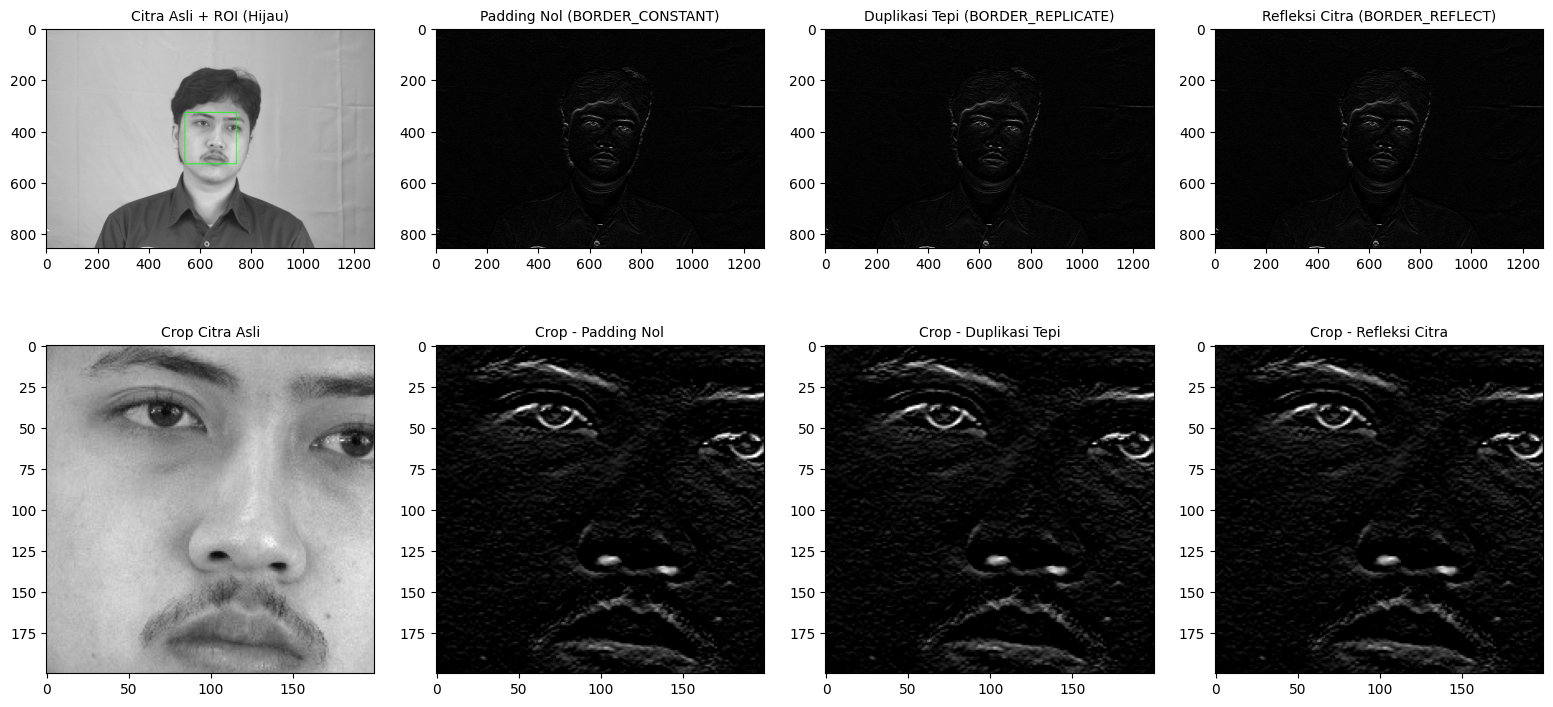

In [41]:
filename = '/content/drive/MyDrive/PCVK/Kuis/Image/A.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Citra tidak ditemukan! Pastikan path benar.")

h, w = img.shape

kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

conv_zero = cv.filter2D(img, -1, kernel, borderType=cv.BORDER_CONSTANT)     # (a) Padding nol
conv_replicate = cv.filter2D(img, -1, kernel, borderType=cv.BORDER_REPLICATE) # (b) Duplikasi piksel tepi
conv_reflect = cv.filter2D(img, -1, kernel, borderType=cv.BORDER_REFLECT)     # (c) Refleksi citra

# Menentukan ROI di tengah citra
roi_size = 200
cx, cy = w // 2, h // 2
x1, y1 = cx - roi_size // 2, cy - roi_size // 2
x2, y2 = cx + roi_size // 2, cy + roi_size // 2

# Memastikan ROI tetap di dalam batas citra
x1, y1 = max(0, x1), max(0, y1)
x2, y2 = min(w, x2), min(h, y2)

# Menambahkan kotak ROI di citra asli
img_box = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
cv.rectangle(img_box, (x1, y1), (x2, y2), (0,255,0), 2)

crop_asli = img[y1:y2, x1:x2]
crop_zero = conv_zero[y1:y2, x1:x2]
crop_replicate = conv_replicate[y1:y2, x1:x2]
crop_reflect = conv_reflect[y1:y2, x1:x2]

plt.figure(figsize=(16,8))

titles_top = [
    "Citra Asli + ROI (Hijau)",
    "Padding Nol (BORDER_CONSTANT)",
    "Duplikasi Tepi (BORDER_REPLICATE)",
    "Refleksi Citra (BORDER_REFLECT)"
]

images_top = [
    cv.cvtColor(img_box, cv.COLOR_BGR2RGB),
    conv_zero,
    conv_replicate,
    conv_reflect
]

titles_bottom = [
    "Crop Citra Asli",
    "Crop - Padding Nol",
    "Crop - Duplikasi Tepi",
    "Crop - Refleksi Citra"
]

images_bottom = [
    crop_asli,
    crop_zero,
    crop_replicate,
    crop_reflect
]

for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(images_top[i], cmap='gray')
    plt.title(titles_top[i], fontsize=10)
    plt.axis('on')

for i in range(4):
    plt.subplot(2, 4, i+5)
    plt.imshow(images_bottom[i], cmap='gray')
    plt.title(titles_bottom[i], fontsize=10)
    plt.axis('on')

plt.tight_layout(pad=2.0, w_pad=1.0)
plt.show()
